In [1]:
import pandas as pd
import numpy as np

In [2]:
path = r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\Kagel_Bynary_prediction_Poisonus Mushrooms\mushroom\data\clean\clean_3.parquet'

In [3]:
data = pd.read_parquet(path)

In [4]:
df = data.copy()

In [5]:
from scipy.stats import chi2_contingency

In [6]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))


# Crear la funcion 
def cramers_v_matrix(df):
    cols = df.select_dtypes(include=['object','category']).columns.tolist()
    n_cols = len(cols)
    cramers_mat = np.zeros((n_cols,n_cols))
    
    for i in range(n_cols):
        for j in range (i+1, n_cols):
            cramers_mat[i, j] = cramers_v(df[cols[i]], df[cols[j]])
            cramers_mat[j, i] = cramers_mat[i, j]
    
    return pd.DataFrame(cramers_mat, columns=cols, index=cols)
    


In [7]:
correlation_matrix = cramers_v_matrix(df)
print(correlation_matrix)

                         class  cap-shape  cap-surface  does-bruise-or-bleed  \
class                 0.000000   0.167480     0.252828              0.037558   
cap-shape             0.167480   0.000000     0.195460              0.194187   
cap-surface           0.252828   0.195460     0.000000              0.136983   
does-bruise-or-bleed  0.037558   0.194187     0.136983              0.000000   
gill-attachment       0.233304   0.305576     0.248644              0.250803   
gill-spacing          0.115410   0.289909     0.231689              0.093585   
gill-color            0.219998   0.259182     0.208501              0.135109   
stem-root             0.178507   0.118520     0.164917              0.082523   
stem-surface          0.230362   0.216384     0.240337              0.149585   
stem-color            0.257236   0.138178     0.173529              0.111554   
veil-type             0.050573   0.075025     0.132510              0.028797   
veil-color            0.172112   0.09160

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
columnas_categoricas = df.select_dtypes(include=['object','category']).columns.tolist()

In [10]:
label_encoders = {}
for col in columnas_categoricas:
    if col in df.columns:  # Check if the column exists in df2
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    else:
        print(f"Column '{col}' not found in DataFrame")   

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 int64  
 1   cap-diameter          float64
 2   cap-shape             int64  
 3   cap-surface           int64  
 4   does-bruise-or-bleed  int64  
 5   gill-attachment       int64  
 6   gill-spacing          int64  
 7   gill-color            int64  
 8   stem-height           float64
 9   stem-width            float64
 10  stem-root             int64  
 11  stem-surface          int64  
 12  stem-color            int64  
 13  veil-type             int64  
 14  veil-color            int64  
 15  has-ring              int64  
 16  ring-type             int64  
 17  season                int64  
dtypes: float64(3), int64(15)
memory usage: 428.0 MB


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

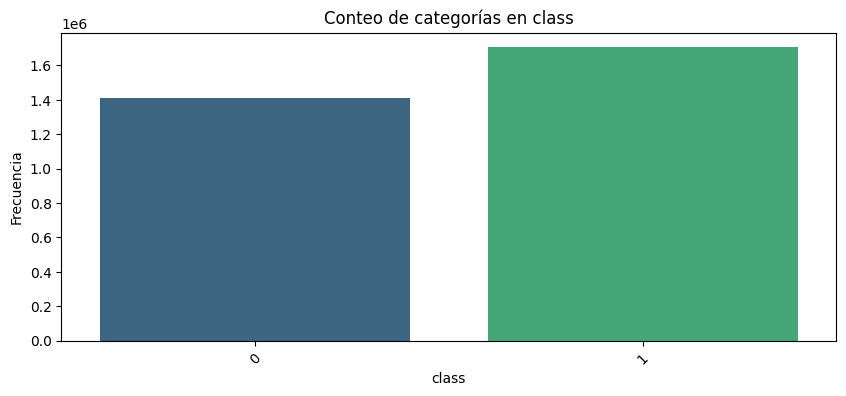

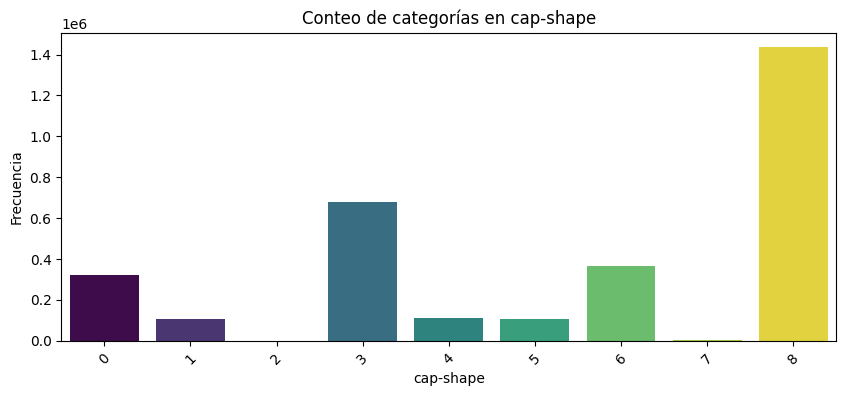

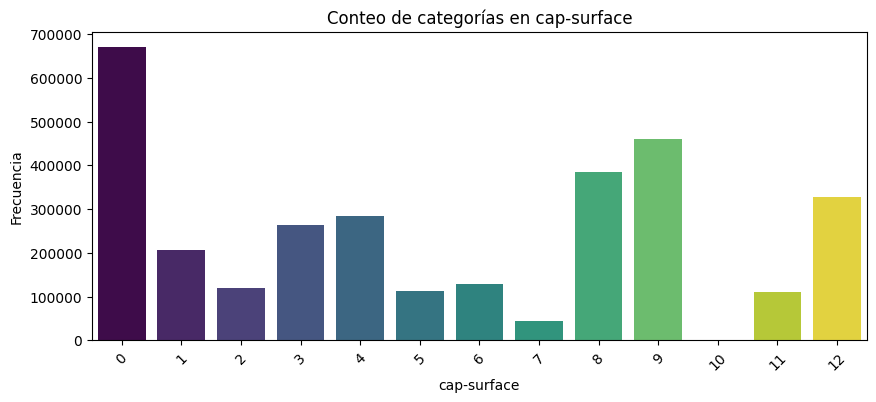

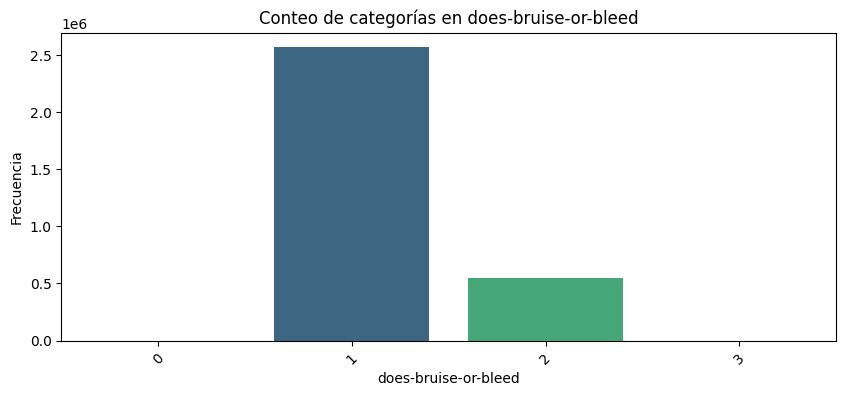

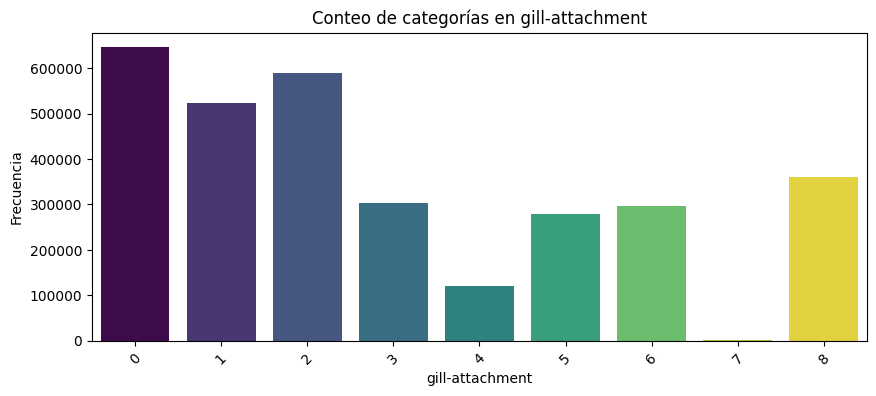

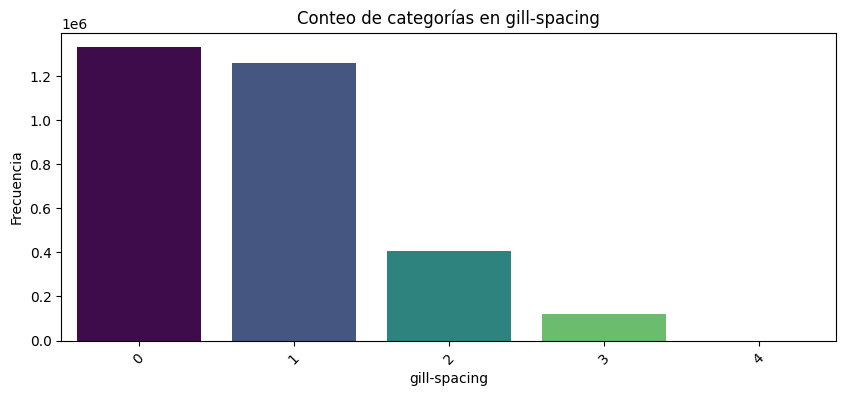

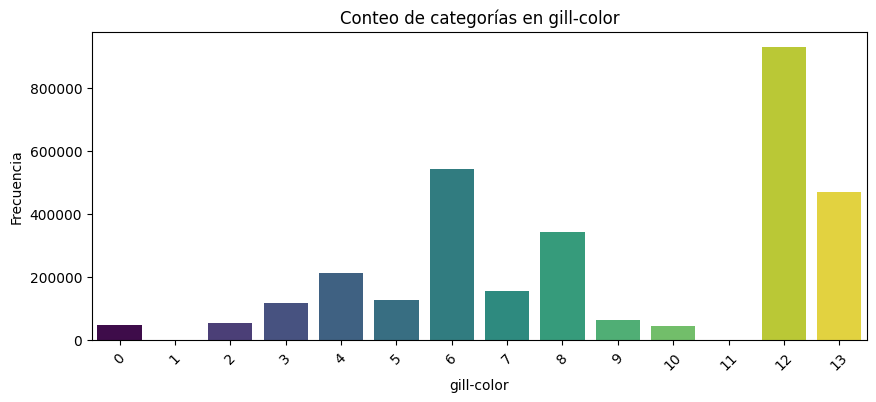

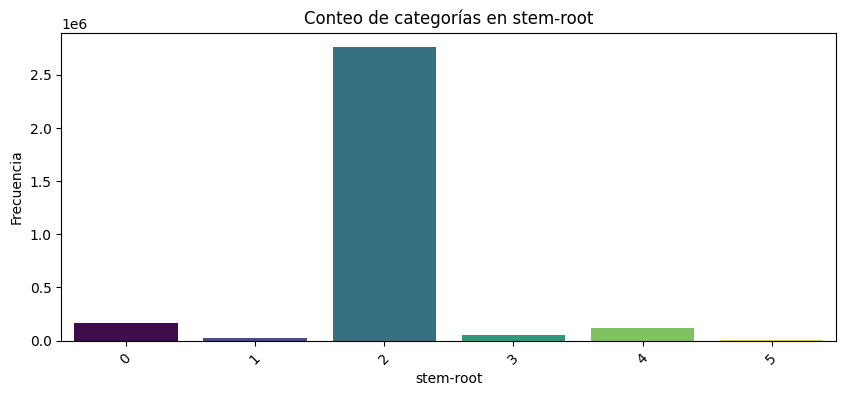

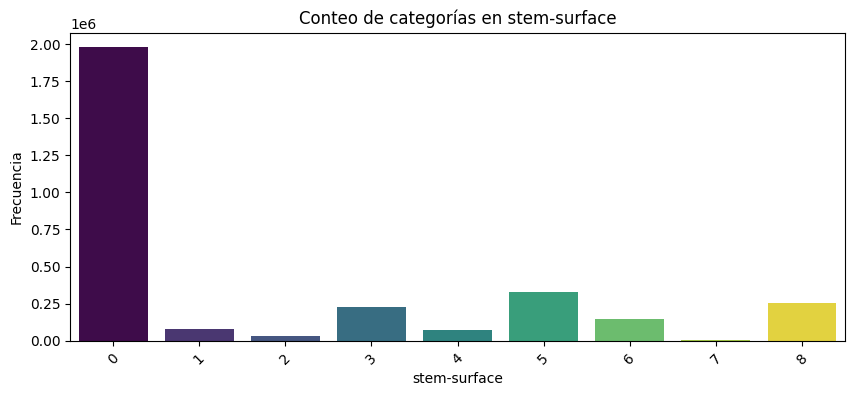

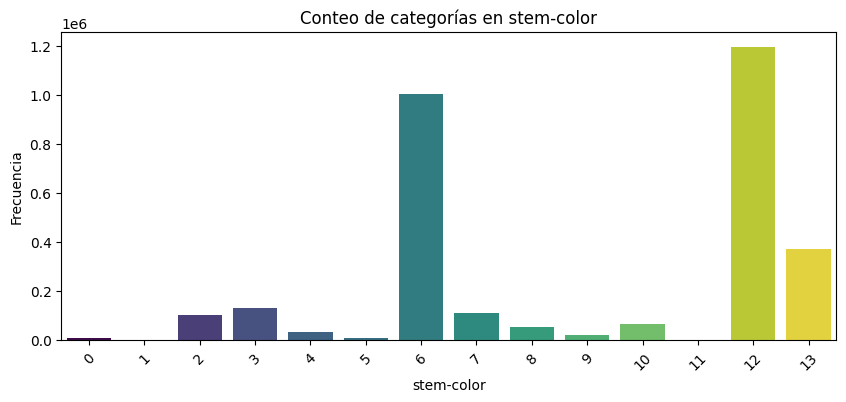

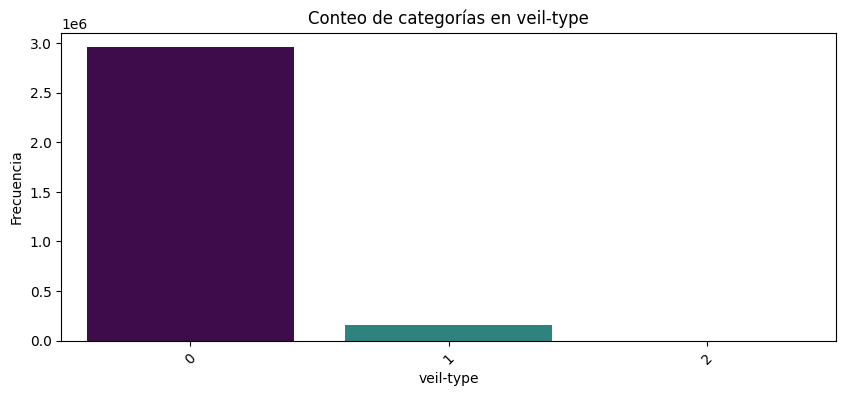

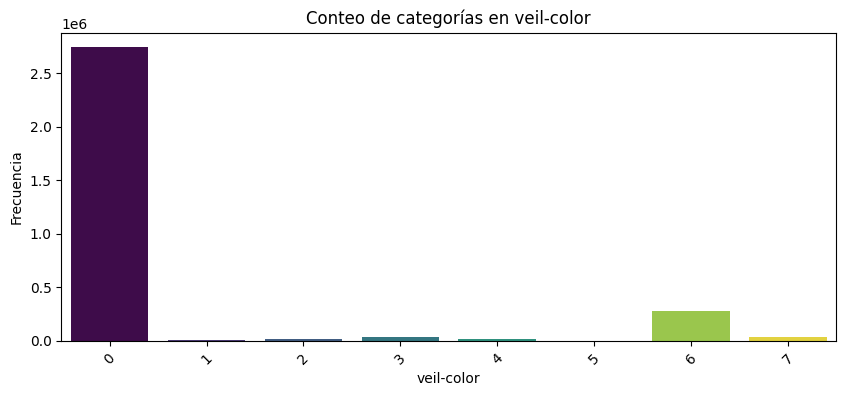

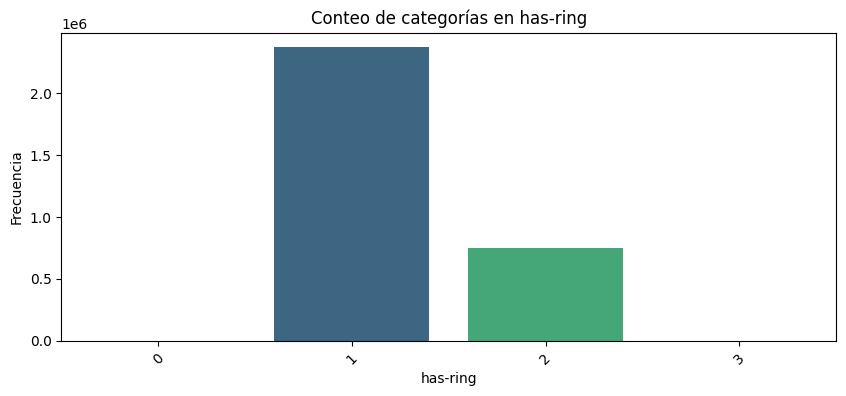

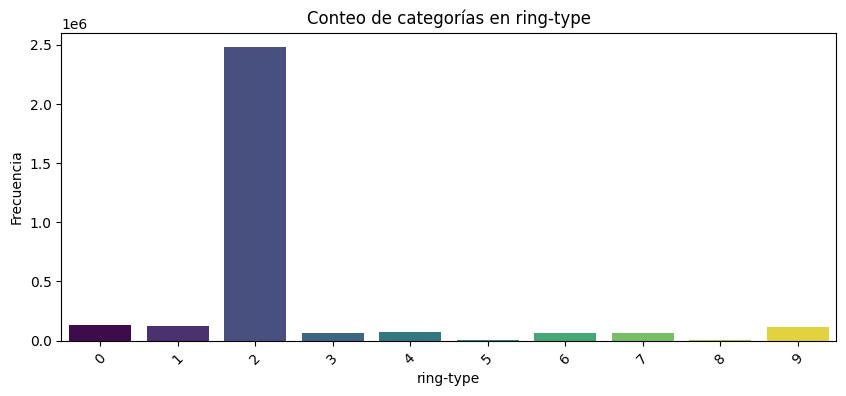

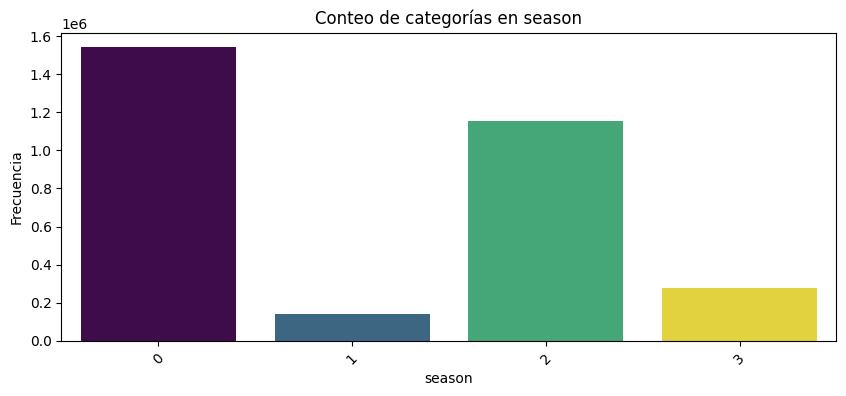

In [13]:
for col in columnas_categoricas:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Conteo de categorías en {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
    plt.show()

In [34]:
df1 =df.copy()

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 int64  
 1   cap-diameter          float64
 2   cap-shape             int64  
 3   cap-surface           int64  
 4   does-bruise-or-bleed  int64  
 5   gill-attachment       int64  
 6   gill-spacing          int64  
 7   gill-color            int64  
 8   stem-height           float64
 9   stem-width            float64
 10  stem-root             int64  
 11  stem-surface          int64  
 12  stem-color            int64  
 13  veil-type             int64  
 14  veil-color            int64  
 15  has-ring              int64  
 16  ring-type             int64  
 17  season                int64  
dtypes: float64(3), int64(15)
memory usage: 428.0 MB


In [35]:
df1['stem-volume'] = df1['stem-width'] * df1['stem-height']

In [39]:
df1['cap-vol'] = df1['cap-diameter'] * df1['cap-shape']
df1['cap-delta'] = (df1['cap-diameter'] + df1['stem-width'])/df1['stem-width']

In [43]:
df1['stem-delta'] = df1['cap-diameter']/df1['stem-root']

In [44]:
corr_m = df1.corr()

In [45]:
cort = abs(corr_m['class'])
no_relevant_features = cort[cort<0.02]
relevant_features = cort[cort>=0.02]

In [46]:
relevant_features

class                   1.000000
cap-diameter            0.162627
cap-shape               0.109269
does-bruise-or-bleed    0.037541
gill-attachment         0.105420
gill-spacing            0.080409
gill-color              0.074447
stem-height             0.049740
stem-width              0.169807
stem-root               0.113281
stem-surface            0.054255
stem-color              0.084083
veil-type               0.050533
veil-color              0.036922
has-ring                0.049619
ring-type               0.112373
season                  0.063554
stem-volume             0.123404
cap-vol                 0.178434
cap-delta               0.108701
stem-delta              0.140012
Name: class, dtype: float64

In [52]:
path = r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\Kagel_Bynary_prediction_Poisonus Mushrooms\mushroom\data\clean\ready.parquet'

In [53]:
df1.to_parquet(path)